In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud # 需要安装: pip install wordcloud
import os # 用于检查字体文件是否存在

In [19]:
# --- 1. 配置 ---

# 设置文件路径 (请确保路径正确，使用原始字符串 r'' 或双反斜杠 \\)
file_path = r"/Users/wangjingwen/Documents/GitHub/is6941-ml-social-media/taptap/data/integrated/cleaned_taptap_reviews.csv"

# 设置 Matplotlib 支持中文显示
# 你可能需要根据你的操作系统和安装的字体进行调整
# 常见的选择: 'SimHei', 'Microsoft YaHei', 'Arial Unicode MS'
# 如果下面的字体在你的系统上不存在，请替换为你系统上有的中文字体
plt.rcParams['font.sans-serif'] = ['Hei']
plt.rcParams['axes.unicode_minus'] = False # 解决负号'-'显示为方块的问题

In [20]:
# --- 2. 加载数据 ---
print(f"正在加载数据: {file_path}")
try:
    df = pd.read_csv(file_path)
    print(f"数据加载成功. 数据集形状: {df.shape}")
except FileNotFoundError:
    print(f"错误: 文件未找到 {file_path}")
    exit()
except Exception as e:
    print(f"加载数据时发生错误: {e}")
    exit()

正在加载数据: /Users/wangjingwen/Documents/GitHub/is6941-ml-social-media/taptap/data/integrated/cleaned_taptap_reviews.csv
数据加载成功. 数据集形状: (39985, 9)


In [21]:
# --- 3. 基本信息和缺失值 ---
print("\n--- 数据基本信息 ---")
df.info()

print("\n--- 前5行数据预览 ---")
print(df.head())

print("\n--- 每列缺失值数量 ---")
print(df.isnull().sum())
# 如果有需要，可以处理缺失值，例如填充或删除
# df.dropna(subset=['review_content'], inplace=True) # 示例：删除评论内容为空的行
# df['device_model'].fillna('Unknown', inplace=True) # 示例：填充设备型号


--- 数据基本信息 ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39985 entries, 0 to 39984
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   user_id         39985 non-null  int64 
 1   username        39979 non-null  object
 2   rating          39985 non-null  int64 
 3   review_content  39954 non-null  object
 4   likes           39985 non-null  int64 
 5   publish_time    39985 non-null  object
 6   device_model    39985 non-null  object
 7   game_name       39985 non-null  object
 8   sentiment       39985 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 2.7+ MB

--- 前5行数据预览 ---
     user_id       username  rating              review_content  likes  \
0  696432312            。。。       5       体验 一下 剧情 不错 可能 会 有点 迷      0   
1  679295528           云淡风轻       5                      剧情 很 好      0   
2  700357357        qqqqq美女       5  刺激 感受 友情 亲情 自我 爱慕 传承 等待 纯真      1   
3  402380140  User402380140  

In [22]:
# --- 4. 描述性统计 (数值列) ---
print("\n--- 数值列描述性统计 ---")
# 选择你认为是数值型的列进行统计
numerical_cols = ['rating', 'likes', 'sentiment']
print(df[numerical_cols].describe())


--- 数值列描述性统计 ---
             rating         likes     sentiment
count  39985.000000  39985.000000  39985.000000
mean       3.379992      4.456996      0.659072
std        1.667205     28.214437      0.474027
min        1.000000      0.000000      0.000000
25%        1.000000      0.000000      0.000000
50%        4.000000      1.000000      1.000000
75%        5.000000      2.000000      1.000000
max        5.000000   2855.000000      1.000000



--- 绘制数值列分布图 ---


/var/folders/sb/_xkqlk0d7l397c8w3c6_4qrc0000gn/T/ipykernel_24709/3361003415.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=df, palette='viridis')
/var/folders/sb/_xkqlk0d7l397c8w3c6_4qrc0000gn/T/ipykernel_24709/3361003415.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=df, palette='coolwarm')


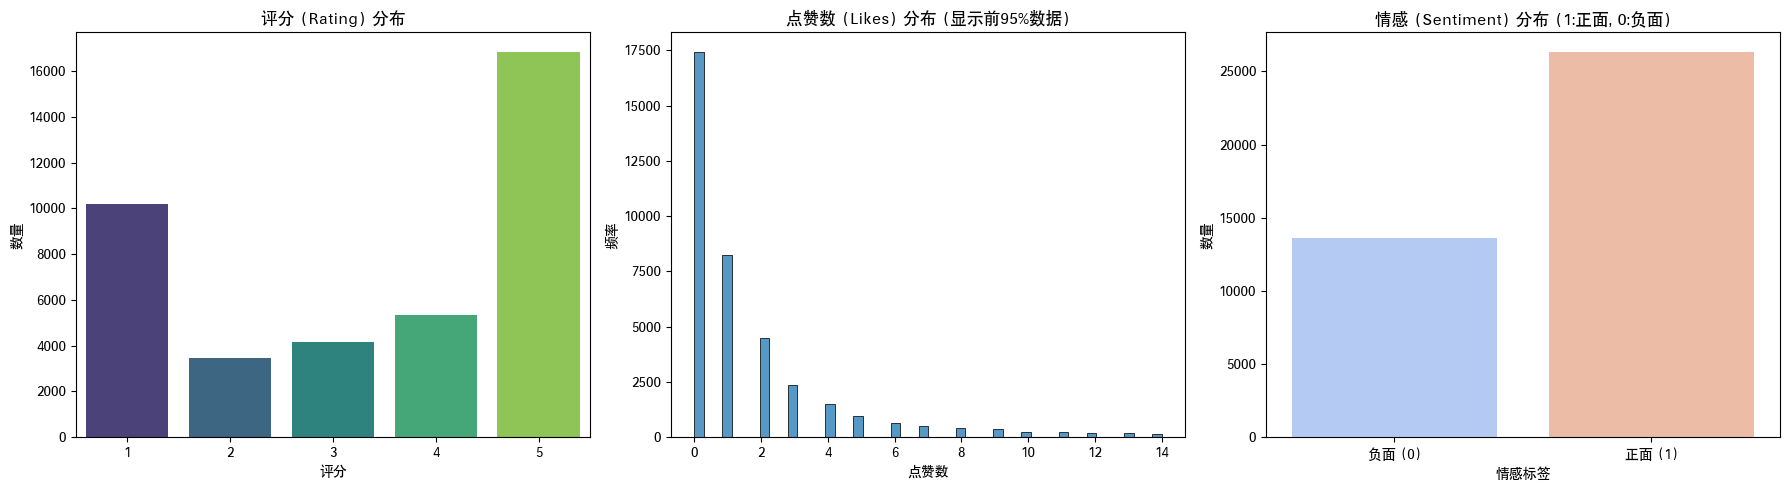

In [23]:
# --- 5. 数值列分布可视化 ---
print("\n--- 绘制数值列分布图 ---")
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.countplot(x='rating', data=df, palette='viridis')
plt.title('评分 (Rating) 分布')
plt.xlabel('评分')
plt.ylabel('数量')

plt.subplot(1, 3, 2)
# 点赞数可能非常偏斜，可以考虑对数变换或限制范围
# sns.histplot(df['likes'], bins=50, kde=True)
sns.histplot(df[df['likes'] < df['likes'].quantile(0.95)]['likes'], bins=50, kde=False) # 显示前95%的数据
plt.title('点赞数 (Likes) 分布 (显示前95%数据)')
plt.xlabel('点赞数')
plt.ylabel('频率')
# 如果点赞数差异很大，可以尝试对数坐标轴
# plt.yscale('log')

plt.subplot(1, 3, 3)
sns.countplot(x='sentiment', data=df, palette='coolwarm')
plt.title('情感 (Sentiment) 分布 (1:正面, 0:负面)')
plt.xlabel('情感标签')
plt.ylabel('数量')
plt.xticks([0, 1], ['负面 (0)', '正面 (1)']) # 确保标签清晰

plt.tight_layout()
plt.show()


--- 分类列频率分析 ---

评分值计数:
rating
5    16845
1    10191
4     5327
3     4181
2     3441
Name: count, dtype: int64

情感值计数:
sentiment
1    0.659072
0    0.340928
Name: proportion, dtype: float64

Top 15 设备型号:
device_model
unknown                   8937
红米 K70                     492
Vivo IQOO Neo9             459
Redmi K70 Ultra            399
Redmi Note 12 Turbo        380
小米Xiaomi 14                379
Redmi K60                  364
Vivo IQOO Neo8             307
Vivo IQOO 12               299
Vivo IQOO Z9 Turbo         287
小米13                       265
Redmi K50                  262
小米24117RK2CC               210
Xiaomi Redmi K60 Ultra     205
一加手机Ace 3                  195
Name: count, dtype: int64


/var/folders/sb/_xkqlk0d7l397c8w3c6_4qrc0000gn/T/ipykernel_24709/540731326.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_devices.index, x=top_devices.values, palette='magma')


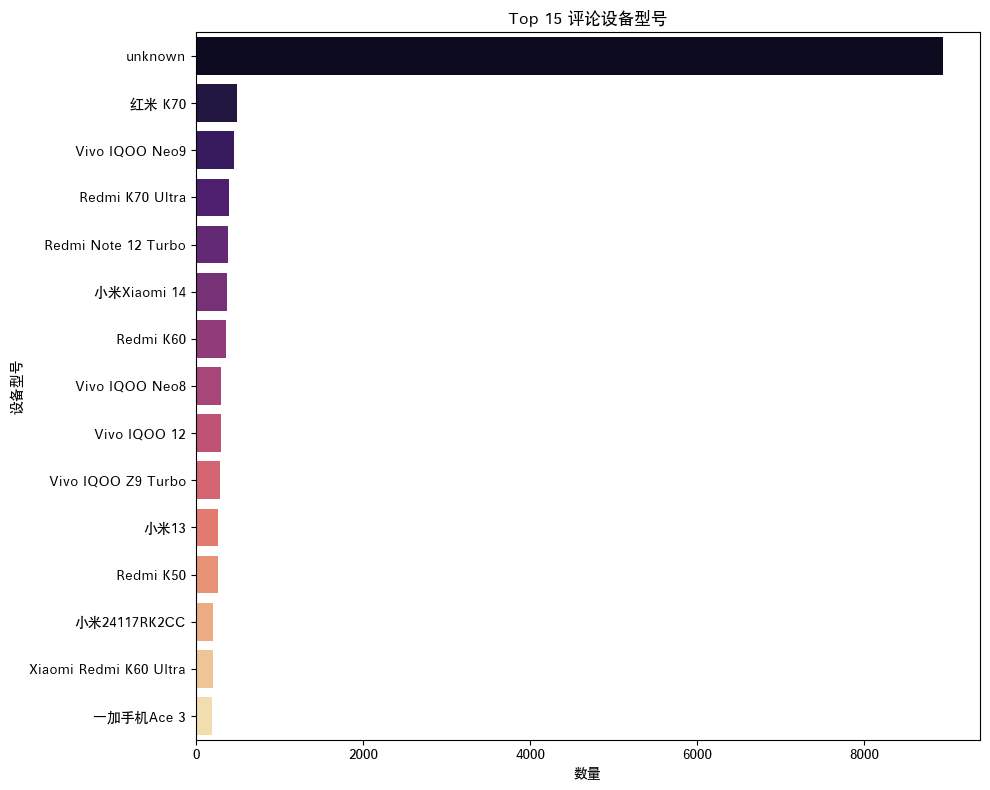


游戏名称计数:
game_name
7_years_from_now               1000
icey                           1000
wuthering_waves                1000
terraria                       1000
tears_of_themis                1000
teamfight_tactics              1000
soul_knight                    1000
snowbreak_containment_zone     1000
reverse_1999                   1000
phigros                        1000
onmyoji                        1000
musedash                       1000
light_and_night                1000
aether_gazer                   1000
infinity_nikki                 1000
justice                        1000
zenless_zone_zero              1000
arknights                      1000
honkai_impact_3                1000
azur_lane                      1000
genshin_impact                 1000
bang_dream_girls_band_party    1000
blue_archive                   1000
game_for_peace                 1000
dead_cells                     1000
fate_grand_order               1000
honkai_star_rail               1000
delta_for

In [24]:
# --- 6. 分类列分析 ---
print("\n--- 分类列频率分析 ---")

# 评分值计数 (虽然是数字，但也可看作分类)
print("\n评分值计数:")
print(df['rating'].value_counts())

# 情感值计数
print("\n情感值计数:")
print(df['sentiment'].value_counts(normalize=True)) # 显示比例

# 设备型号计数 (可能非常多，只看最常见的)
print("\nTop 15 设备型号:")
top_devices = df['device_model'].value_counts().head(15)
print(top_devices)

plt.figure(figsize=(10, 8))
sns.barplot(y=top_devices.index, x=top_devices.values, palette='magma')
plt.title('Top 15 评论设备型号')
plt.xlabel('数量')
plt.ylabel('设备型号')
plt.tight_layout()
plt.show()

# 游戏名称计数 (如果数据集包含多个游戏)
print("\n游戏名称计数:")
game_counts = df['game_name'].value_counts()
print(game_counts)
# 如果游戏数量不多，可以绘制条形图
if len(game_counts) > 1 and len(game_counts) < 30:
    plt.figure(figsize=(10, 6))
    sns.barplot(y=game_counts.index, x=game_counts.values, palette='cubehelix')
    plt.title('各游戏评论数量')
    plt.xlabel('数量')
    plt.ylabel('游戏名称')
    plt.tight_layout()
    plt.show()
elif len(game_counts) == 1:
    print(f"数据集中只包含游戏: {game_counts.index[0]}")


--- 评论长度分析 ---
评论长度描述性统计:
count    39985.00000
mean        91.53260
std        266.66406
min          1.00000
25%         15.00000
50%         30.00000
75%         73.00000
max      21689.00000
Name: review_length, dtype: float64


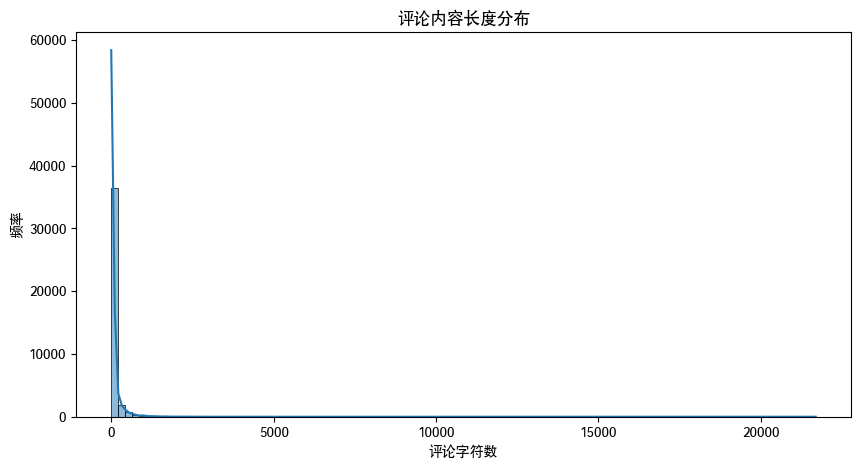

In [25]:
# --- 7. 文本数据初步分析 ---
print("\n--- 评论长度分析 ---")
# 确保 review_content 是字符串类型，以防有数字或其他类型误入
df['review_length'] = df['review_content'].astype(str).apply(len)

print("评论长度描述性统计:")
print(df['review_length'].describe())

plt.figure(figsize=(10, 5))
sns.histplot(df['review_length'], bins=100, kde=True)
plt.title('评论内容长度分布')
plt.xlabel('评论字符数')
plt.ylabel('频率')
# 可以限制x轴范围，排除极端值的影响
# plt.xlim(0, df['review_length'].quantile(0.99)) # 例如，显示前99%的数据
plt.show()


--- 时间序列分析 ---

每月评论数量:
publish_time
2017-06-30    2
2017-07-31    0
2017-08-31    1
2017-09-30    0
2017-10-31    0
Freq: ME, dtype: int64


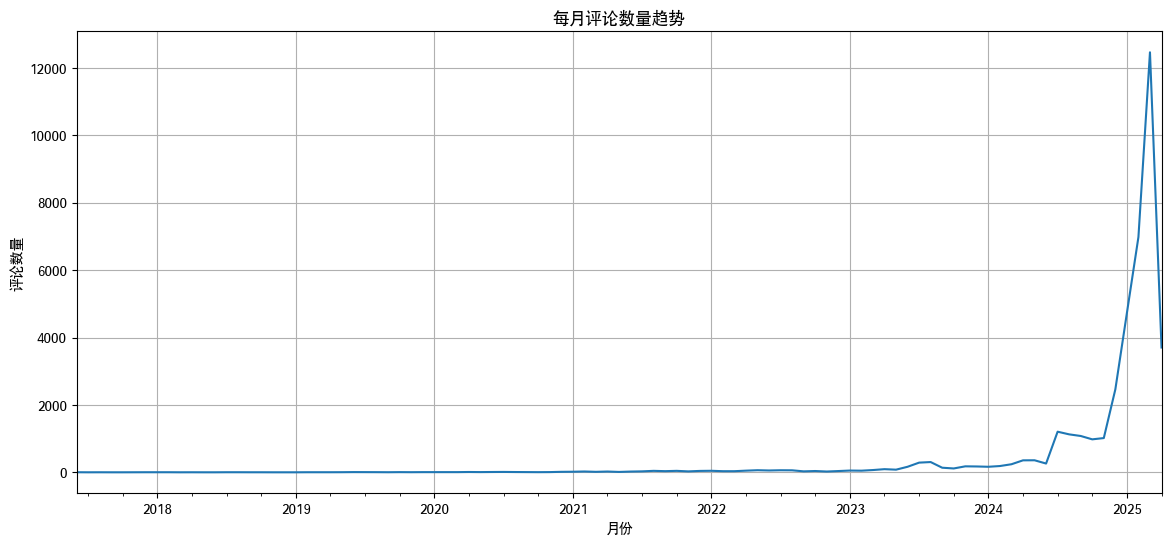

In [26]:
# --- 8. 时间序列分析 ---
print("\n--- 时间序列分析 ---")
try:
    # 转换 'publish_time' 为 datetime 对象，如果失败则跳过
    df['publish_time'] = pd.to_datetime(df['publish_time'])

    # 按月统计评论数量
    df.set_index('publish_time', inplace=True) # 设置时间为索引方便重采样
    reviews_per_month = df.resample('ME').size() # 'ME' 表示 Month End
    df.reset_index(inplace=True) # 恢复索引

    print("\n每月评论数量:")
    print(reviews_per_month.head()) # 显示最早几个月的数据

    plt.figure(figsize=(14, 6))
    reviews_per_month.plot()
    plt.title('每月评论数量趋势')
    plt.xlabel('月份')
    plt.ylabel('评论数量')
    plt.grid(True)
    plt.show()

except Exception as e:
    print(f"处理 'publish_time' 时出错: {e}. 跳过时间序列分析.")
    # 确保即使出错，后续代码也能执行（如果df的索引被修改了）
    if 'publish_time' not in df.columns and isinstance(df.index, pd.DatetimeIndex):
        df.reset_index(inplace=True)


--- 变量关系探索 ---


/var/folders/sb/_xkqlk0d7l397c8w3c6_4qrc0000gn/T/ipykernel_24709/333552127.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='rating', y='likes', data=df, palette='viridis', showfliers=False) # showfliers=False 隐藏异常值点


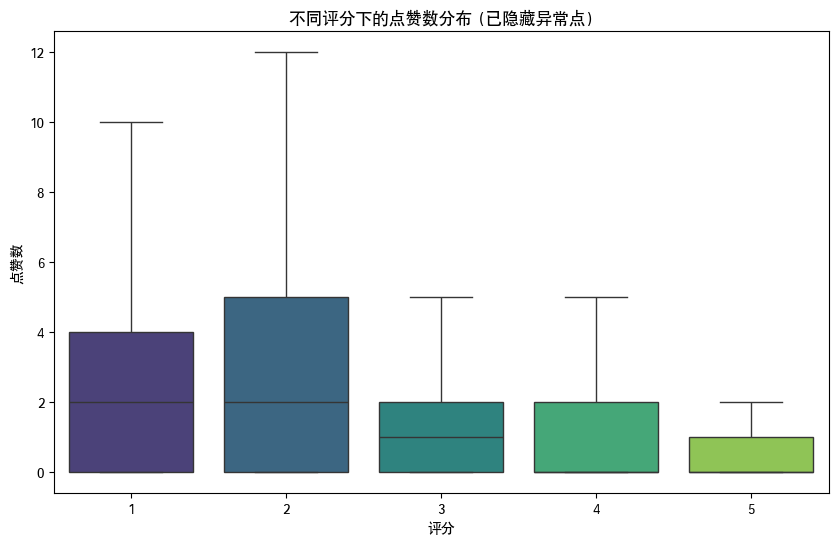

/var/folders/sb/_xkqlk0d7l397c8w3c6_4qrc0000gn/T/ipykernel_24709/333552127.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sentiment', y='rating', data=avg_rating_sentiment, palette='coolwarm')


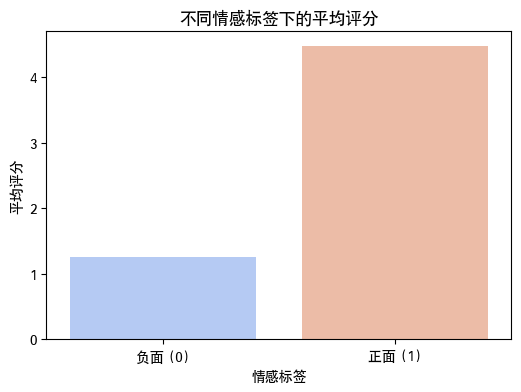

In [27]:
# --- 9. 关系探索 ---
print("\n--- 变量关系探索 ---")

# 评分 vs 点赞数 (箱线图)
plt.figure(figsize=(10, 6))
# 限制y轴范围可以更好地显示主体数据
y_limit = df['likes'].quantile(0.95) # 例如，只显示95%的数据点赞范围
sns.boxplot(x='rating', y='likes', data=df, palette='viridis', showfliers=False) # showfliers=False 隐藏异常值点
# 或者不隐藏，但限制y轴
# plt.ylim(0, y_limit)
plt.title('不同评分下的点赞数分布 (已隐藏异常点)')
plt.xlabel('评分')
plt.ylabel('点赞数')
plt.show()

# 情感 vs 评分 (均值条形图)
avg_rating_sentiment = df.groupby('sentiment')['rating'].mean().reset_index()
plt.figure(figsize=(6, 4))
sns.barplot(x='sentiment', y='rating', data=avg_rating_sentiment, palette='coolwarm')
plt.title('不同情感标签下的平均评分')
plt.xlabel('情感标签')
plt.ylabel('平均评分')
plt.xticks([0, 1], ['负面 (0)', '正面 (1)'])
plt.show()


--- 生成词云 (可能需要几秒钟) ---
使用字体: /System/Library/Fonts/STHeiti Medium.ttc


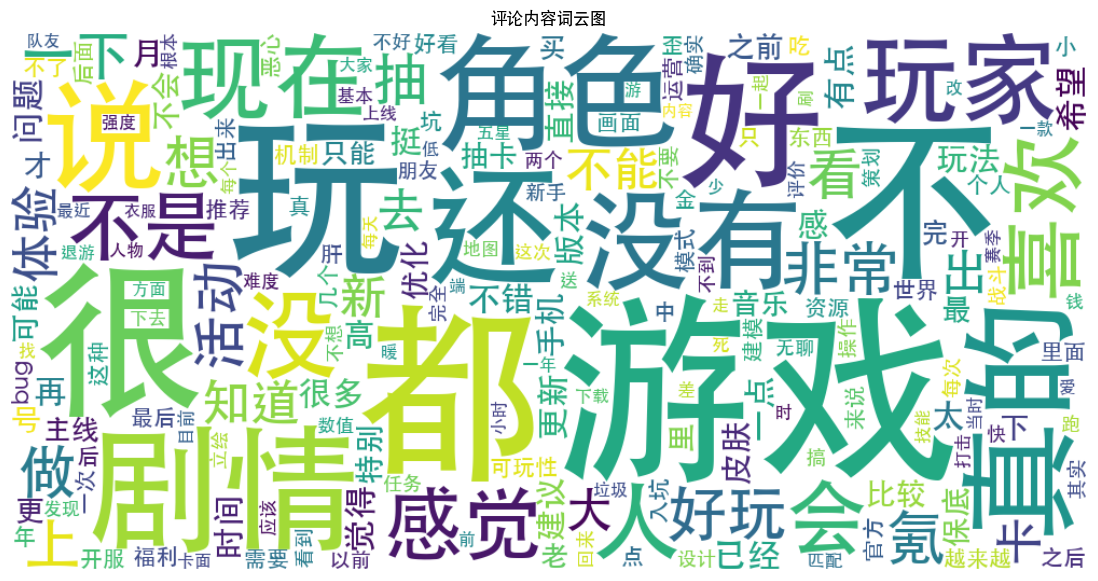


--- 描述性分析完成 ---


In [28]:
# --- 10. (可选) 词云 ---
print("\n--- 生成词云 (可能需要几秒钟) ---")
# 注意: WordCloud 需要中文字体支持，否则会显示方块
# 尝试查找一个常见的中文字体路径
font_path = None
if os.path.exists('C:/Windows/Fonts/simhei.ttf'):
    font_path = 'C:/Windows/Fonts/simhei.ttf'
elif os.path.exists('/System/Library/Fonts/STHeiti Medium.ttc'): # macOS 常见路径
    font_path = '/System/Library/Fonts/STHeiti Medium.ttc'
# elif os.path.exists('/usr/share/fonts/truetype/wqy/wqy-microhei.ttc'): # Linux 常见路径
#     font_path = '/usr/share/fonts/truetype/wqy/wqy-microhei.ttc'

if font_path:
    print(f"使用字体: {font_path}")
    try:
        # 合并所有评论文本，处理可能的 NaN 值
        text = " ".join(review for review in df['review_content'].astype(str) if review)

        # 创建词云对象
        wordcloud = WordCloud(
            width=1000,
            height=500,
            background_color='white',
            font_path=font_path, # 指定中文字体路径
            # max_words=200, # 可以限制最大词数
            # stopwords=None, # 可以提供一个中文停用词列表
            collocations=False # 避免词语搭配
        ).generate(text)

        # 显示词云图
        plt.figure(figsize=(15, 7))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title('评论内容词云图')
        plt.show()
    except ImportError:
        print("错误: 未安装 wordcloud 库. 请运行 'pip install wordcloud'")
    except Exception as e:
        print(f"生成词云时发生错误: {e}")
        print("请确保字体路径正确且 wordcloud 库已安装。")
else:
    print("警告: 未找到合适的中文字体用于生成词云。跳过词云步骤。")
    print("请在代码中设置 'font_path' 为你系统中的有效中文字体文件路径。")


print("\n--- 描述性分析完成 ---")